# Project III
## Video Game Sales
### Elena Wu-Ratner, Fall 2019
#### Dataset downloaded from: https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings/data#
##### Games released between 1980-2018 and sales over 100,000 are included in this dataset

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Reading CSV file
df = pd.read_csv(r'C:\Users\Elena Wu-Ratner\Downloads\Video_Game_Sales.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


### Finding 1

When sorting by publisher, the publisher with the most average global sales for their games is Palcom who only released Teenage Mutant Ninja Turtles for the NES. Surprisingly, other well-known video game publishers like Nintendo and Valve could not compete with Palcom's average global sales of over 3.5 million, despite Valve having the highest critic score of all publishers.

Text(0.5, 0, 'Average Global Sales in Millions')

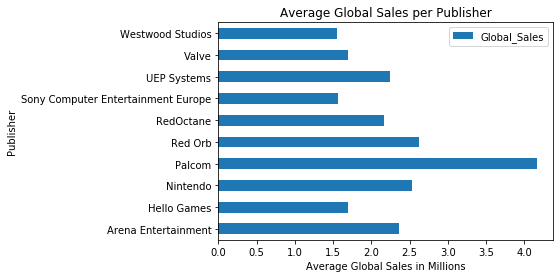

In [3]:
# Creating new dataframe with Publisher as an index
dfpubgroup = df.groupby("Publisher")
pubdf = dfpubgroup.mean()
pubdf['Publisher'] = pubdf.index

# Filtering for publishers with over 1.5 million average global sales
new_pubdf = pubdf[pubdf['Global_Sales'] > 1.5]

# Plotting
new_pubdf.plot.barh(x = 'Publisher', y = 'Global_Sales')
plt.title('Average Global Sales per Publisher')
plt.xlabel('Average Global Sales in Millions')

In [4]:
# Which game Palcom published
df[df['Publisher'] == 'Palcom']

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
279,Teenage Mutant Ninja Turtles,NES,1989.0,Action,Palcom,3.38,0.44,0.31,0.04,4.17,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 0, 'Critic Score (out of 100)')

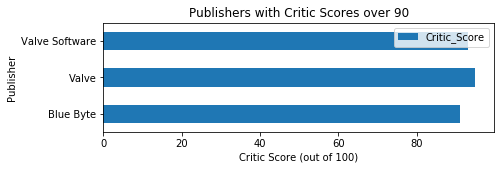

In [5]:
# Highest Critic Scores of Publishers
pubdf['Publisher'] = pubdf.index

# Filtering publishers with game critc scores over 90
critic_pubdf = pubdf[pubdf['Critic_Score'] > 90]

# Plotting graph
critic_pubdf.plot.barh(x = 'Publisher', y = 'Critic_Score', figsize= (7,2))
plt.title('Publishers with Critic Scores over 90')
plt.xlabel('Critic Score (out of 100)')

### Finding 2

While grouping by platform, I wanted to look again at the average global sales and was surprised to see the NES and Gameboy had the highest sales by a significant amount despite being relatively old platforms and neither coming close to the largest amount of games on a platform (which are the PS2 and DS).

Text(0.5, 0, 'Number of Games')

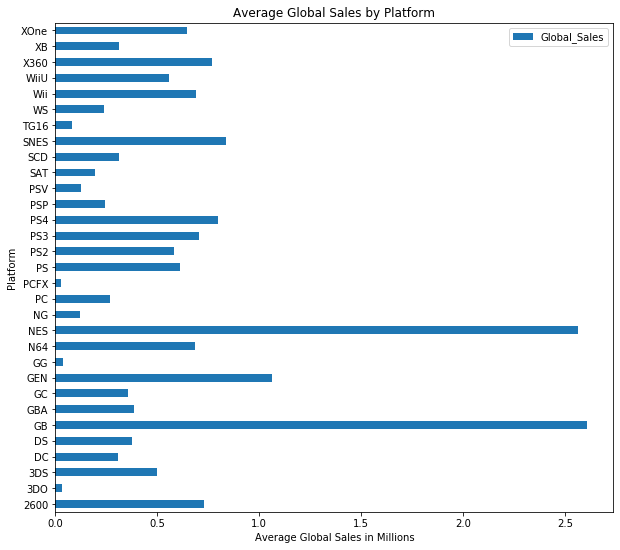

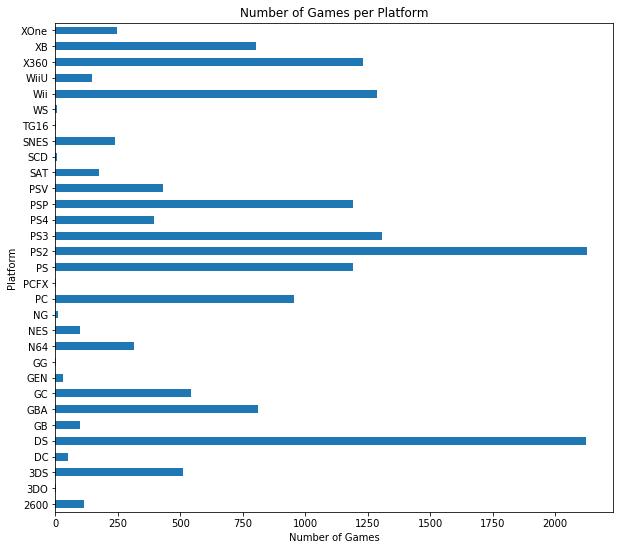

In [6]:
#Had trouble putting these two graphs side-by-side so kept them above and below each other

# Creating Platform index and grouping data by mean
dfplatgroup = df.groupby("Platform")
platdf = dfplatgroup.mean()
platdf['Platform'] = platdf.index

# Plotting the graph
platdf.plot.barh(x = 'Platform', y = 'Global_Sales', figsize= (10,9))
plt.title("Average Global Sales by Platform")
plt.xlabel('Average Global Sales in Millions')

# Creating Platform index again but now grouping by count
game_platdf = dfplatgroup.count()
game_platdf['Platform'] = game_platdf.index

# Plotting the graph
"""
I made the Y axis Year of Release because every game in the dataset had a 
year of release so it gave me a benchmark for how many games each platform 
had
"""
game_platdf.plot.barh(x = "Platform", y = "Year_of_Release", figsize=(10,9), legend=None)
plt.title("Number of Games per Platform")
plt.xlabel("Number of Games")

Some games from the NES and GameBoy for reference

In [8]:
df[df['Platform'] == 'NES'].head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988.0,Platform,Nintendo,9.54,3.44,3.84,0.46,17.28,NaN,NaN,NaN,NaN,NaN,NaN
98,Super Mario Bros. 2,NES,1988.0,Platform,Nintendo,5.39,1.18,0.70,0.19,7.46,NaN,NaN,NaN,NaN,NaN,NaN
124,The Legend of Zelda,NES,1986.0,Action,Nintendo,3.74,0.93,1.69,0.14,6.51,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df[df['Platform'] == 'GB'].head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10,NaN,NaN,NaN,NaN,NaN,NaN
21,Super Mario Land,GB,1989.0,Platform,Nintendo,10.83,2.71,4.18,0.42,18.14,NaN,NaN,NaN,NaN,NaN,NaN
30,Pokémon Yellow: Special Pikachu Edition,GB,1998.0,Role-Playing,Nintendo,5.89,5.04,3.12,0.59,14.64,NaN,NaN,NaN,NaN,NaN,NaN


### Finding 3

After filtering by publisher and platform, I wanted to look at the global sales per genre. It is important to note that the far outlier above 80 million sales is Wii Sports which was given for free with every Wii purchase, resulting in it having significantly more sales than other genres/games. Because of this, I intentionally left this outlier out because it unfairly skewed the data.

I orginally thought that role-playing games would have the highest average global sales, but it was interesting to discover that the platform genre outperformed them by a longshot; however, looking at the games that are part of the platform genre (the most sold ones being Mario games), this is an obvious feat from one of the most, if not the most, well known video game brands.

Text(0, 0.5, 'Genre')

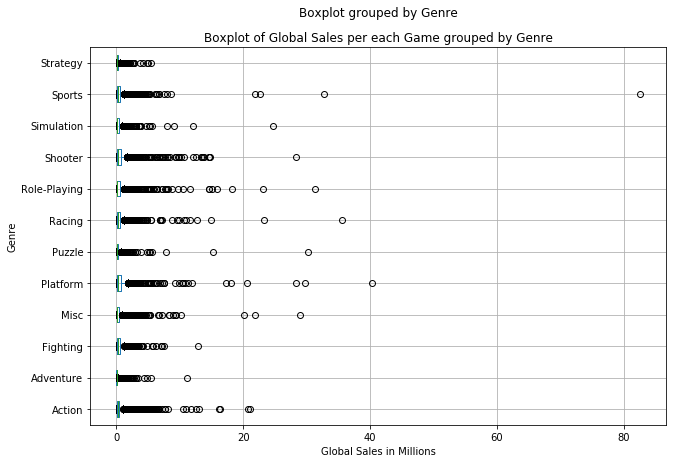

In [10]:
# Used a boxplot because I couldn't get scatterplots to work with a non numerical x value
df.boxplot(column = 'Global_Sales', by = 'Genre', figsize= (10,7), vert = False)
plt.title("Boxplot of Global Sales per each Game grouped by Genre")
plt.xlabel("Global Sales in Millions")
plt.ylabel("Genre")

Text(0.5, 0, 'Average Global Sales in Millions')

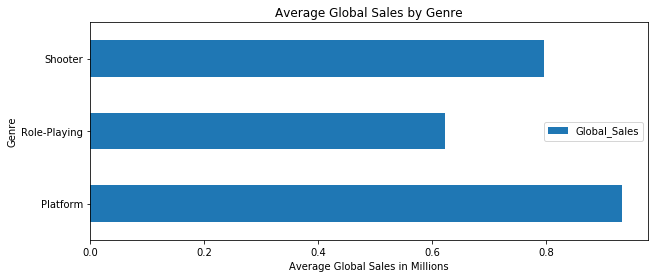

In [11]:
# Indexing by genre and looking at average global sales per genre
dfgenregroup = df.groupby("Genre")
genredf = dfgenregroup.mean()
genredf['Genre'] = genredf.index

# Plotting average global sales per genre
high_sales_genredf = genredf[(genredf['Global_Sales'] > 0.6) & (genredf['Global_Sales'] < 50)]
high_sales_genredf.plot.barh(x = 'Genre', y = 'Global_Sales', figsize=(10,4))
plt.title("Average Global Sales by Genre")
plt.xlabel("Average Global Sales in Millions")

In [12]:
# All of the best selling platform games are Mario
platformdf = df[df['Genre'] == 'Platform']
platformdf[platformdf['Global_Sales'] > 15]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
18,Super Mario World,SNES,1990.0,Platform,Nintendo,12.78,3.75,3.54,0.55,20.61,NaN,NaN,NaN,NaN,NaN,NaN
21,Super Mario Land,GB,1989.0,Platform,Nintendo,10.83,2.71,4.18,0.42,18.14,NaN,NaN,NaN,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988.0,Platform,Nintendo,9.54,3.44,3.84,0.46,17.28,NaN,NaN,NaN,NaN,NaN,NaN


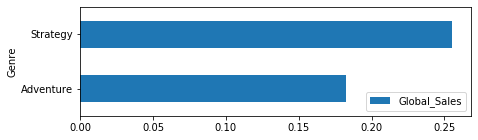

In [13]:
# I also briefly looked at the genres with the lowest average sales
low_sales_genredf = genredf[genredf['Global_Sales'] < 0.3]
low_sales_genredf.plot.barh(x = 'Genre', y = 'Global_Sales',figsize=(7,2))